In [42]:
# Module 5 | Convolution NN for image processing; dropout


#importing datasets

%pip install tensorflow-datasets
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt




Note: you may need to restart the kernel to use updated packages.


In [33]:
# loading a portion of the data, and batching the data
def preprocess(example):
    image = tf.cast(example['image'], tf.float32) / 255.0  # rescale
    label = example['label']
    return image, label

# making train and validation sets
train = tfds.load('cifar10', split='train[:20%]', shuffle_files=True)
val   = tfds.load('cifar10', split='train[20%:30%]', shuffle_files=True)

# batching train and validation sets
train = train.map(preprocess).batch(32)
val   = val.map(preprocess).batch(32)


In [34]:
#fitting the model
model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(filters = 32, kernel_size = (2, 2), 
           activation= 'relu'), 
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(units=10, 
          activation="softmax",
          kernel_initializer="he_normal")
 ])







In [35]:
# Compiling the model

model.compile(
    loss = SparseCategoricalCrossentropy(),
    optimizer = 'adam',
    metrics = ["accuracy"]
)

In [44]:
# Fitting & saving the model, converted dataset into the proper (X, y) structure,
# Images & Labels both normalized


history = model.fit(train, validation_data=val, epochs=30)

# This next step confirms the model: 
for image, label in train.take(1):
    print(image.shape, label)


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8581 - loss: 0.4993 - val_accuracy: 0.5568 - val_loss: 1.5256
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8635 - loss: 0.4843 - val_accuracy: 0.5556 - val_loss: 1.5440
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8700 - loss: 0.4695 - val_accuracy: 0.5550 - val_loss: 1.5630
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8746 - loss: 0.4551 - val_accuracy: 0.5530 - val_loss: 1.5831
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8817 - loss: 0.4413 - val_accuracy: 0.5518 - val_loss: 1.6038
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8874 - loss: 0.4279 - val_accuracy: 0.5494 - val_loss: 1.6254
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8923 - loss: 0.4150 - val_accuracy: 0.5492 - val_loss: 1.6474
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8966 - loss: 0.4024 - val_accuracy: 0.

2025-11-02 13:17:00.063341: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


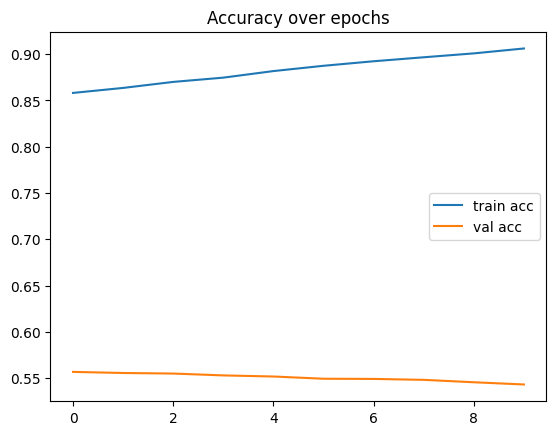

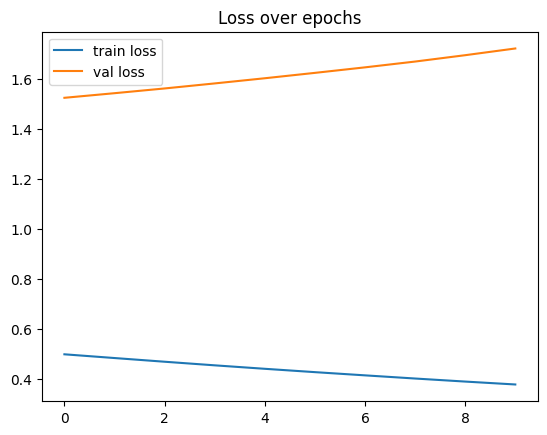

In [45]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend(); plt.title("Accuracy over epochs"); plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend(); plt.title("Loss over epochs"); plt.show()